In [2]:
%reload_ext autoreload
%autoreload 2

In [3]:
import sys,os
import numpy as np
import matplotlib.pyplot as plt
sys.path.append(os.path.join(os.getcwd(), '../'))
from hardware.slm import SLM
from hardware.camera import NITCam
from hardware.waveshaper import Waveshaper
from hardware.yokogawa_osa import YokogawaOSA


In [8]:
camera = NITCam()
camera.bitDepth = 14
camera.exposure_time = 10000
camera.analog_gain = "High"
# camera.FPS = 10
camera.frame_width = 360
camera.frame_height = 240
camera.offset_x = 676
camera.offset_y = 464

Observer initialized


In [9]:
camera.connect()

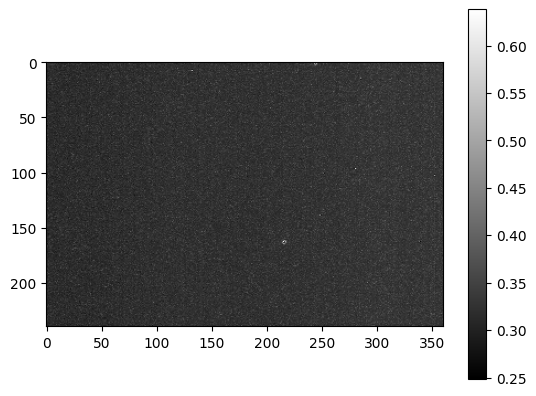

In [12]:
single_frame = camera.capture_single_frame(save_log=True)
camera.plot_frame(single_frame)

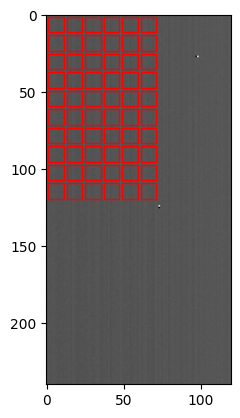

In [59]:
camera.grid_config.matrixsize_0 = 10
camera.grid_config.matrixsize_1 = 6
camera.grid_config.elem_width = 10
camera.grid_config.elem_height = 10
camera.grid_config.gap_x = 2
camera.grid_config.gap_y = 2
camera.grid_config.topleft_x = 1
camera.grid_config.topleft_y = 1

camera.grid_config.plot_rect_array(single_frame)

In [28]:
from experiments.speckle_collector import SpeckleCollector
sc = SpeckleCollector(camera, dlc)

In [18]:
sc.laser.connect()
sc.camera.connect()

In [128]:
sc.scan_wl_pattern(1550, 1555, step_MHz=10e3, filename = r'Z:\Maodong\test\test_wl_pattern_3')

{1550.0: array([[0.31245804, 0.3365684 , 0.31203076, ..., 0.30861259, 0.3211866 ,
         0.31660867],
        [0.30177623, 0.30366844, 0.32899958, ..., 0.32185802, 0.3211866 ,
         0.31966063],
        [0.31142038, 0.35170603, 0.31764632, ..., 0.3042178 , 0.3091009 ,
         0.3142892 ],
        ...,
        [0.30037233, 0.30806324, 0.31184766, ..., 0.32381126, 0.33943722,
         0.31709698],
        [0.3213697 , 0.30586582, 0.32002684, ..., 0.31337363, 0.37416834,
         0.32448268],
        [0.30623206, 0.315571  , 0.28938535, ..., 0.32960996, 0.31795153,
         0.32472685]], dtype=float32),
 1550.080142917455: array([[0.31581518, 0.33699566, 0.31544894, ..., 0.30446196, 0.32564244,
         0.3166697 ],
        [0.30458403, 0.3084905 , 0.32613075, ..., 0.3243606 , 0.32405543,
         0.32423854],
        [0.31935543, 0.35133982, 0.32075933, ..., 0.31172556, 0.31422818,
         0.31282428],
        ...,
        [0.29493988, 0.3101996 , 0.31142038, ..., 0.32112557, 0.34

In [33]:
camera.info('test finished')

In [23]:
camera.frame_width = 120

In [79]:
sc.collect_wl_pattern(1552);

In [127]:
sc.info('test finished '*100)

In [61]:
camera.grid_config.matrix_from_image(single_frame)

array([[0.31657693, 0.31595433, 0.31663981, 0.31644571, 0.31665748,
        0.31711772],
       [0.31660378, 0.31592688, 0.31630409, 0.31649575, 0.31643409,
        0.31697613],
       [0.31614357, 0.31598851, 0.31663245, 0.31651101, 0.31633705,
        0.31702617],
       [0.31624794, 0.31581578, 0.31631812, 0.316522  , 0.31619912,
        0.31684184],
       [0.31601596, 0.31613317, 0.31656045, 0.31608069, 0.31635416,
        0.31684551],
       [0.31610876, 0.31567845, 0.31630287, 0.31633338, 0.31619483,
        0.31676614],
       [0.31602758, 0.31535187, 0.31609595, 0.31606236, 0.31614417,
        0.31657693],
       [0.31608558, 0.31575656, 0.31630471, 0.31627724, 0.31592381,
        0.31671792],
       [0.31611794, 0.31561741, 0.31624305, 0.31633705, 0.31611732,
        0.31669533],
       [0.31595433, 0.31548738, 0.31617528, 0.31612828, 0.31599462,
        0.31661841]])

In [62]:
single_frame

array([[0.31654763, 0.3205762 , 0.31795153, ..., 0.31813467, 0.32332295,
        0.32173595],
       [0.3141671 , 0.31593725, 0.31850088, ..., 0.3164866 , 0.32222426,
        0.31966063],
       [0.31544894, 0.31886712, 0.31880608, ..., 0.3153879 , 0.32204115,
        0.3192944 ],
       ...,
       [0.31361777, 0.31587622, 0.31605932, ..., 0.31587622, 0.32234633,
        0.31892815],
       [0.31410608, 0.3145944 , 0.3169749 , ..., 0.31550997, 0.32484892,
        0.31917232],
       [0.31435025, 0.3150827 , 0.3148996 , ..., 0.31734115, 0.3206983 ,
        0.31801257]], dtype=float32)

In [48]:
single_frame.shape

(240, 120)

In [5]:
from hardware.toptica_laser import TopticaLaser
dlc = TopticaLaser()

In [40]:
dlc.connect()

In [41]:
dlc.laser1.ctl.wavelength_act.get()

1560.000493526488

In [44]:
from hardware.keysight_fg import KeysightFG
fg = KeysightFG()
fg.connect()

1

In [45]:
fg.get_channel_amplitude(1)

0.1

In [11]:
import toptica.lasersdk as lasersdk
import toptica.lasersdk.dlcpro.v2_4_0 as dlcsdk
from toptica.lasersdk import decop, client

connection = dlcsdk.NetworkConnection("192.168.1.18")
client = client.Client(connection)
dlc = dlcsdk.DLCpro(connection)

In [12]:
dlc.open()

In [46]:
dlc.laser1.ctl.wavelength_act.get()

1560.000493526488

In [24]:
dlc.laser1.ctl.wavelength_set.set(1560.0)

0

In [34]:
dlc.close()